# Task A
**Data understanding**
1. Identification & removal of null values;
2. Identification and removal of invalid transaction amount values;
3. Identification of removal of invalid age values;
4. Display the 5 top locations where the maximum number of transactions occurred

**Performing RFM segmentation**
5. Write a query to define and calculate the RFM value per customer
6. Check the distribution of Recency, Frequency and Monetary values
7. Briefly discuss the issue skewness and remove skew from the data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importing Pandas to read our data, displaying into a dataframe (df) with 100k+ rows and 9 columns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')
print(df)

        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16    

# Task A.1

In [8]:
# Identifying how many rows have null values using isnull method
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
# Creating a new df called df_clean, using dropna method to remove rows containing null values
df_clean = df.dropna()
print(df_clean)

        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16    

In [10]:
# Checking new dataframe to see whether rows containing null values has been cleaned
# however, we can't see cells with null values as they are between the first and last 5 rows
df_clean.isnull()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1048562,False,False,False,False,False,False,False,False,False
1048563,False,False,False,False,False,False,False,False,False
1048564,False,False,False,False,False,False,False,False,False
1048565,False,False,False,False,False,False,False,False,False


In [11]:
# So, we check from a summarised overview of the full dataset by adding the .sum() function
df_clean.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


# Task A.2

In [12]:
# Identifying invalid transaction amounts, which we are classifying as
# any transaction between 0.00 and 0.01
df_clean[df_clean['TransactionAmount (INR)'] < 0.01]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
384,T385,C6117158,25/9/89,M,BANGALORE,128.84,21/10/16,74817,0.0
2498,T2499,C9074213,10/6/88,M,BANGALORE,15834.56,21/10/16,154219,0.0
2623,T2624,C7930692,16/7/93,M,HYDERABAD,5795.30,21/10/16,152742,0.0
2672,T2673,C4397046,13/1/97,M,MUMBAI,185401.34,21/10/16,30017,0.0
4083,T4084,C4227711,3/12/91,M,NEW DELHI,11846.77,22/9/16,70059,0.0
...,...,...,...,...,...,...,...,...,...
1029145,T1029146,C5524842,29/6/63,F,GURGAON,173469.49,13/9/16,33929,0.0
1032164,T1032165,C9026149,15/9/90,M,DERABASSI,8.79,13/9/16,110728,0.0
1036358,T1036359,C5936956,1/1/1800,M,GURGAON,48.90,18/9/16,115328,0.0
1038286,T1038287,C7633429,1/1/1800,M,N T PUNE,181600.42,18/9/16,53145,0.0


In [13]:
# Removal of invalid transaction amounts
df_clean_trans = df_clean[df_clean['TransactionAmount (INR)'] > 0.01 ]
print(df_clean_trans)

        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16    

# Task A.3

In [14]:
# Identification of invalid age values
df_ageIdentification = df_clean_trans[df_clean_trans['CustomerDOB'] == '1/1/1800']
print(df_ageIdentification)

        TransactionID CustomerID CustomerDOB CustGender  \
16                T17   C1376215    1/1/1800          M   
22                T23   C7018081    1/1/1800          M   
28                T29   C7935438    1/1/1800          M   
35                T36   C1211387    1/1/1800          M   
151              T152   C3334638    1/1/1800          M   
...               ...        ...         ...        ...   
1048443      T1048444   C7261226    1/1/1800          M   
1048452      T1048453   C3813481    1/1/1800          M   
1048531      T1048532   C6937679    1/1/1800          M   
1048533      T1048534   C7431884    1/1/1800          M   
1048540      T1048541   C1528025    1/1/1800          M   

                     CustLocation  CustAccountBalance TransactionDate  \
16                         MUMBAI            77495.15          1/8/16   
22       WAYS PANCHKUVA AHMEDABAD              143.07          3/8/16   
28                         MOHALI           969436.12          3/8/16   

In [15]:
# Removal of invalid age values (and given remaining number of total rows)
df_ageRemoval = df_clean_trans[df_clean_trans['CustomerDOB'] != '1/1/1800']
len(df_ageRemoval)

984590

# Task A.4

In [16]:
# Getting the transaction count per location
# Use head() to return the first 5 results
df_ageRemoval['CustLocation'].value_counts().head()

,count
CustLocation,
MUMBAI,97604
BANGALORE,77688
NEW DELHI,76302
GURGAON,70446
DELHI,67263


# Task A.5

In [17]:
# Read cleaned csv file, convert transaction date from string to datetime for analysis
import pandas as pd

df = pd.read_csv('bank_transactions_cleaned.csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
referenceDate = df['TransactionDate'].max() +pd.Timedelta(days=1)

<ipython-input-17-344a7ad4c745>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [18]:
# A.5.1 RECENCY
# Getting the last purchase date of customer
# Subtracting from last transaction date in the df, +1 (the reference data)
def calculateRecency(df, refDate) :
  latePurchaseDate = df.groupby('CustomerID')['TransactionDate'].max()
  recency = refDate - latePurchaseDate
  recencyInDays = recency.dt.days
  return recencyInDays

In [19]:
# A.5.2 FREQUENCY
# Returning the count for each CustomerID
def calculateFrequency(df) :
  return df.groupby('CustomerID')['TransactionID'].nunique()

In [20]:
# A.5.3 MONETARY
# Returning the total transaction value per customer
def calculateMonetary(df) :
  return df.groupby('CustomerID')['TransactionAmount (INR)'].max()

In [21]:
# A.5.4 RFM Model
# Concatenate data above into RFM Model
rfm = pd.DataFrame ({
    'Recency' : calculateRecency(df, referenceDate),
    'Frequency' : calculateFrequency(df),
    'Monetary' : calculateMonetary(df)
})

print("\033[1m\033[4mSorted by Customer ID\033[0m\033[0m")
print(rfm.head())

sortByRecency = rfm.sort_values('Recency', ascending=False)
sortByFrequency = rfm.sort_values('Frequency', ascending=False)
sortByMonetary = rfm.sort_values('Monetary', ascending=False)

# Printing RFM Model with text formatting (bold, underlined titles)
print(' ')
print("\033[1m\033[4mSorted by Recency\033[0m\033[0m")
print(sortByRecency.head())
print(' ')
print("\033[1m\033[4mSorted by Frequency\033[0m\033[0m")
print(sortByFrequency.head())
print(' ')
print("\033[1m\033[4mSorted by Monetary\033[0m\033[0m")
print(sortByMonetary.head())

Sorted by Customer ID
            Recency  Frequency  Monetary
CustomerID                              
C1010011         75          2    4750.0
C1010012        118          1    1499.0
C1010014        155          2    1205.0
C1010018         86          1      30.0
C1010024        114          1    5000.0
 
Sorted by Recency
            Recency  Frequency  Monetary
CustomerID                              
C1010078        337          1     124.0
C8131142        337          1     500.0
C7216961        337          1      75.0
C1879878        337          1     199.0
C6328442        337          1     110.0
 
Sorted by Frequency
            Recency  Frequency  Monetary
CustomerID                              
C1026833        101          6    1245.0
C1736254        103          6    3825.0
C6222360          1          6    5300.0
C6624352         74          6    2805.0
C6735477          1          6    2000.0
 
Sorted by Monetary
            Recency  Frequency    Monetary
CustomerID 

# Task A.5

In [22]:
# Reading in raw data from rfm csv file
import pandas
import numpy

df = pandas.read_csv("bankTransactions_rfm.csv")
print(df.head())

  CustomerID  Recency  Frequency  Monetary
0   C1010011       75          2    4750.0
1   C1010012      118          1    1499.0
2   C1010014      155          2    1205.0
3   C1010018       86          1      30.0
4   C1010024      114          1    5000.0


In [23]:
# Calculating the percentage values for Recency
def RecencyPerc(df) :
  perc = (df / df.max()) * 100
  return 100 - perc

In [24]:
# Calculating the percentage values for Frequency
def FrequencyPerc(df) :
  perc = (df / df.max()) * 100
  return perc

In [25]:
# Using a Log Transformation for Monetary,
# to resolve the issue of skewness within the data.
# We can use LOG(x) here but we use LOG1P(x)
# because it's standard practice; and to avoid LOG(0) error
df['Monetary'] = numpy.log1p(df['Monetary'])

In [26]:
# Percentile Ranking Monetary
# Doing the log transformation and percentile ranking should remove skew from
# the monetary data because log will squish the data and percentile ranking
# will compare the data with its neighbours to put it into ranks
df['Monetary'] = df['Monetary'].rank(pct=True) * 100

In [27]:
# Concatenate into Normalised Model
normalisedRFM = pandas.DataFrame({
    'Customer ID': df['CustomerID'],
    'Recency': RecencyPerc(df['Recency']),
    'Frequency': FrequencyPerc(df['Frequency']),
    'Monetary': df['Monetary']
})

print(normalisedRFM.round().head())

  Customer ID  Recency  Frequency  Monetary
0    C1010011     78.0       33.0      94.0
1    C1010012     65.0       17.0      77.0
2    C1010014     54.0       33.0      73.0
3    C1010018     74.0       17.0       5.0
4    C1010024     66.0       17.0      94.0


In [28]:
# Constructing the RFM categorisation
def CustomerAssignment(row):
    r = row['Recency']
    f = row['Frequency']
    m = row['Monetary']

    if (r >= 70) and (f >= 70) and (m >= 70):
        return 'Best Customer'
    elif (r >= 60) and (f >= 60) and (m >= 60):
        return 'Loyal'
    elif (r >= 50) and (f >= 40) and (m >= 40):
        return 'Potential Loyalist'
    elif (r >= 40) and (f >= 30) and (m >= 30):
        return 'Promising'
    elif (r >= 20) and (f >=30) and (m >= 20):
        return 'Customers Needing Attention'
    elif (r >= 10) and (f >= 15) and (m >= 20):
        return 'At Risk'
    elif (r >= 10) and (f >= 10) and (m >= 10):
        return 'Hibernating'
    else:
        return 'Lost'

normalisedRFM[['Recency', 'Frequency', 'Monetary']] = normalisedRFM[['Recency', 'Frequency', 'Monetary']].astype(int)
normalisedRFM['CustomerGroup'] = normalisedRFM.apply(CustomerAssignment, axis=1)
print(normalisedRFM.head())

  Customer ID  Recency  Frequency  Monetary CustomerGroup
0    C1010011       77         33        93     Promising
1    C1010012       64         16        77       At Risk
2    C1010014       54         33        73     Promising
3    C1010018       74         16         4          Lost
4    C1010024       66         16        94       At Risk


In [29]:
# Grouping customers into tiers by the set r/f/m values
# then displaying table of customers per group tier
groups = [
    'Best Customer',
    'Loyal',
    'Potential Loyalist',
    'Promising',
    'Customers Needing Attention',
    'At Risk',
    'Hibernating',
    'Lost',
]

def CustomerGroupOverview() :
    for group in groups :
        print(normalisedRFM[normalisedRFM['CustomerGroup'] == group])

# Providing the CustomerGroupOverview()
normalisedRFM['CustomerGroup'].value_counts()

,count
CustomerGroup,
At Risk,503617
Lost,136316
Promising,96218
Hibernating,77799
Potential Loyalist,13010
Customers Needing Attention,10385
Loyal,1137
Best Customer,79


In [30]:
groups = [
    'Best Customer',
    'Loyal',
    'Potential Loyalist',
    'Promising',
    'Customers Needing Attention',
    'At Risk',
    'Hibernating',
    'Lost',
]

normalisedRFM['CustomerGroup'] = pd.Categorical(normalisedRFM['CustomerGroup'], categories=groups, ordered=True)
groupCount = normalisedRFM['CustomerGroup'].value_counts().sort_index()
normalisedRFM['CustomerGroup'].value_counts().sort_index()

,count
CustomerGroup,
Best Customer,79
Loyal,1137
Potential Loyalist,13010
Promising,96218
Customers Needing Attention,10385
At Risk,503617
Hibernating,77799
Lost,136316


# Task A.6


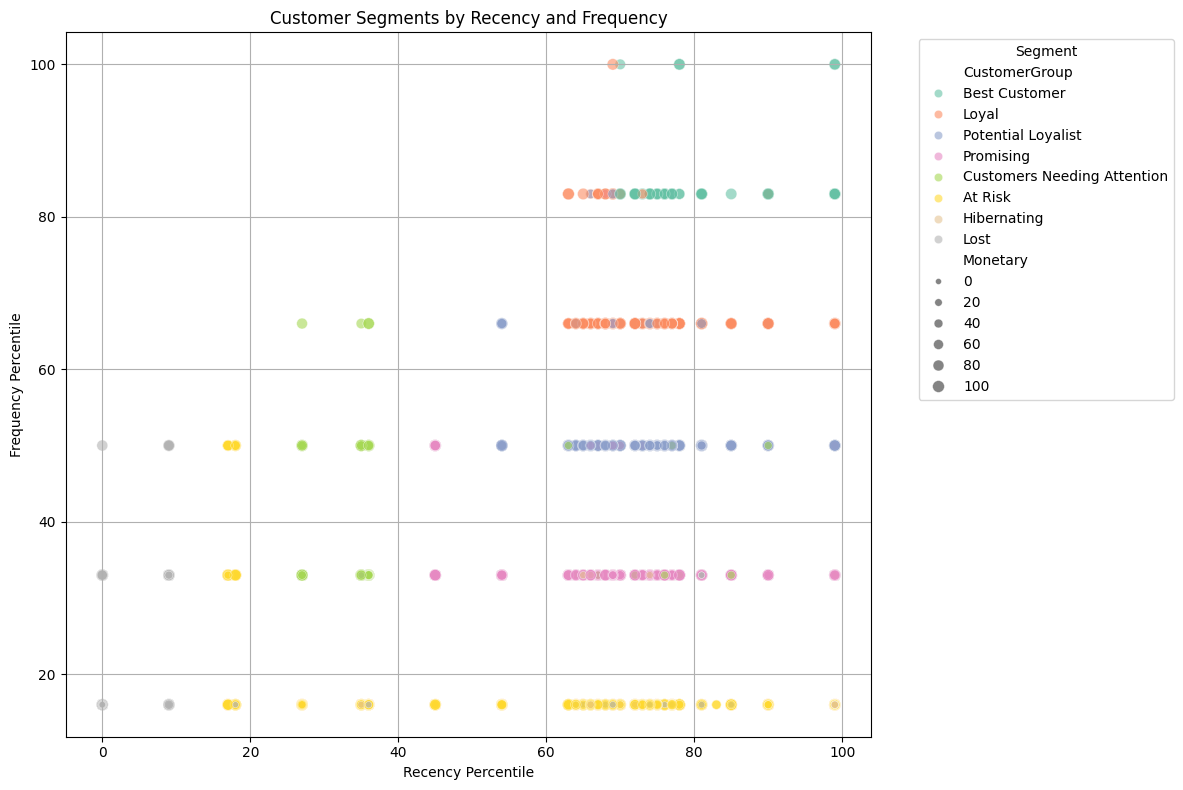

In [31]:
# Showing distrution of RFM values through scatterplot visualisations
# The first we show is Recency and Frequency
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=normalisedRFM,
    x='Recency',
    y='Frequency',
    hue='CustomerGroup',
    palette='Set2',
    alpha=0.6,
    size='Monetary'
)

plt.title('Customer Segments by Recency and Frequency')
plt.xlabel('Recency Percentile')
plt.ylabel('Frequency Percentile')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# The reason we get these clear jumps on the Y axis is due to frequency
# having a granularity between 1-6, this results in 16.6% brackets
print(normalisedRFM[['Recency', 'Frequency', 'Monetary']].describe())

             Recency      Frequency       Monetary
count  838561.000000  838561.000000  838561.000000
mean       60.879687      18.959159      49.500046
std        23.725644       7.383243      28.876952
min         0.000000      16.000000       0.000000
25%        54.000000      16.000000      24.000000
50%        67.000000      16.000000      50.000000
75%        74.000000      16.000000      74.000000
max        99.000000     100.000000     100.000000


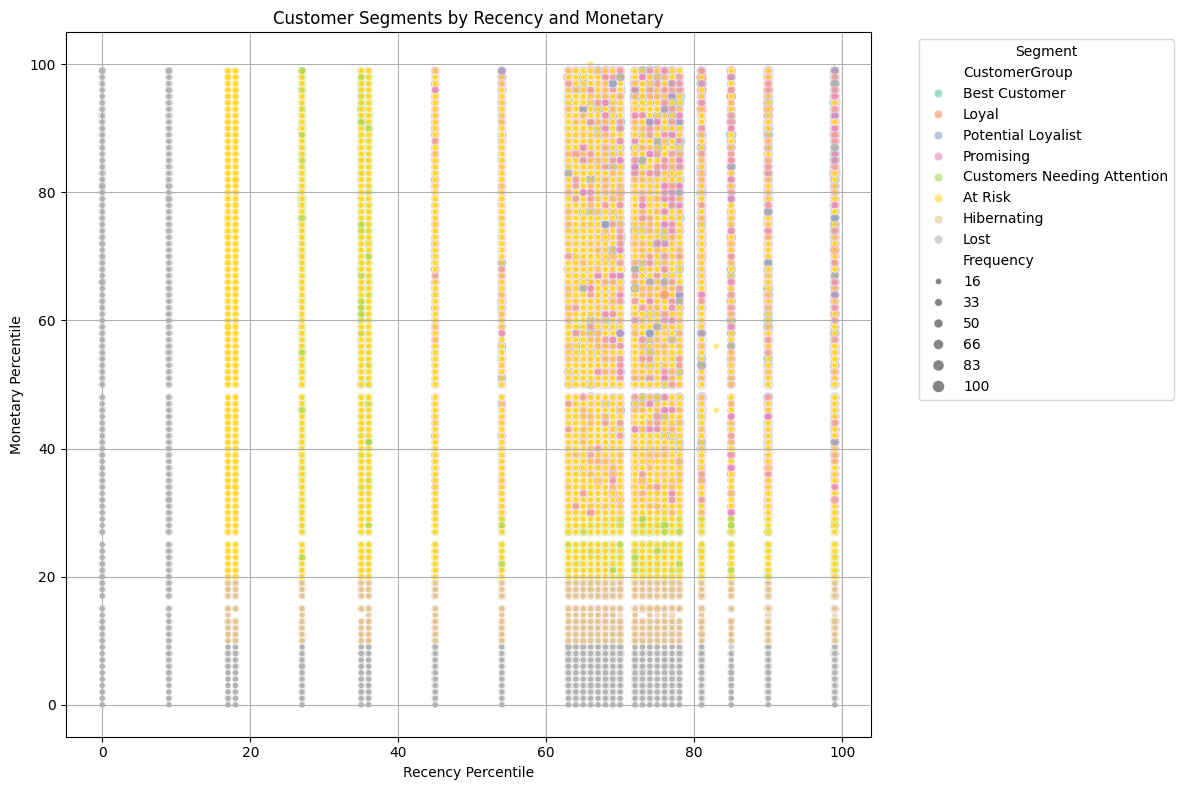

In [33]:
# Plotting the customer segmentation by Recency and Monetary
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=normalisedRFM,
    x='Recency',
    y='Monetary',
    hue='CustomerGroup',
    palette='Set2',
    alpha=0.6,
    size='Frequency'
)

plt.title('Customer Segments by Recency and Monetary')
plt.xlabel('Recency Percentile')
plt.ylabel('Monetary Percentile')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

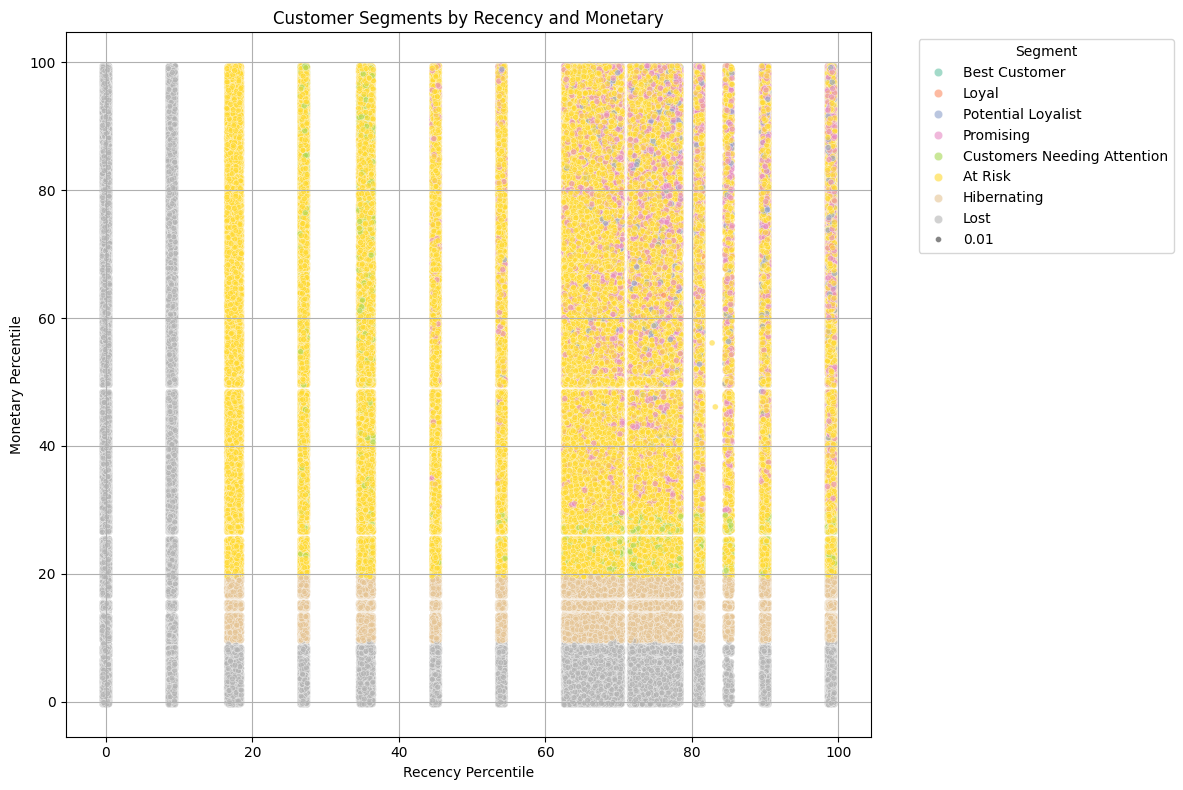

In [34]:
normalisedRFM["Recency_jittered"] = normalisedRFM["Recency"] + numpy.random.uniform(-0.5, 0.5, size=len(normalisedRFM))
normalisedRFM["Monetary_jittered"] = normalisedRFM["Monetary"] + numpy.random.uniform(-0.5, 0.5, size=len(normalisedRFM))

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=normalisedRFM,
    x='Recency_jittered',
    y='Monetary_jittered',
    hue='CustomerGroup',
    palette='Set2',
    alpha=0.6,
    size=0.01
)

plt.title('Customer Segments by Recency and Monetary')
plt.xlabel('Recency Percentile')
plt.ylabel('Monetary Percentile')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

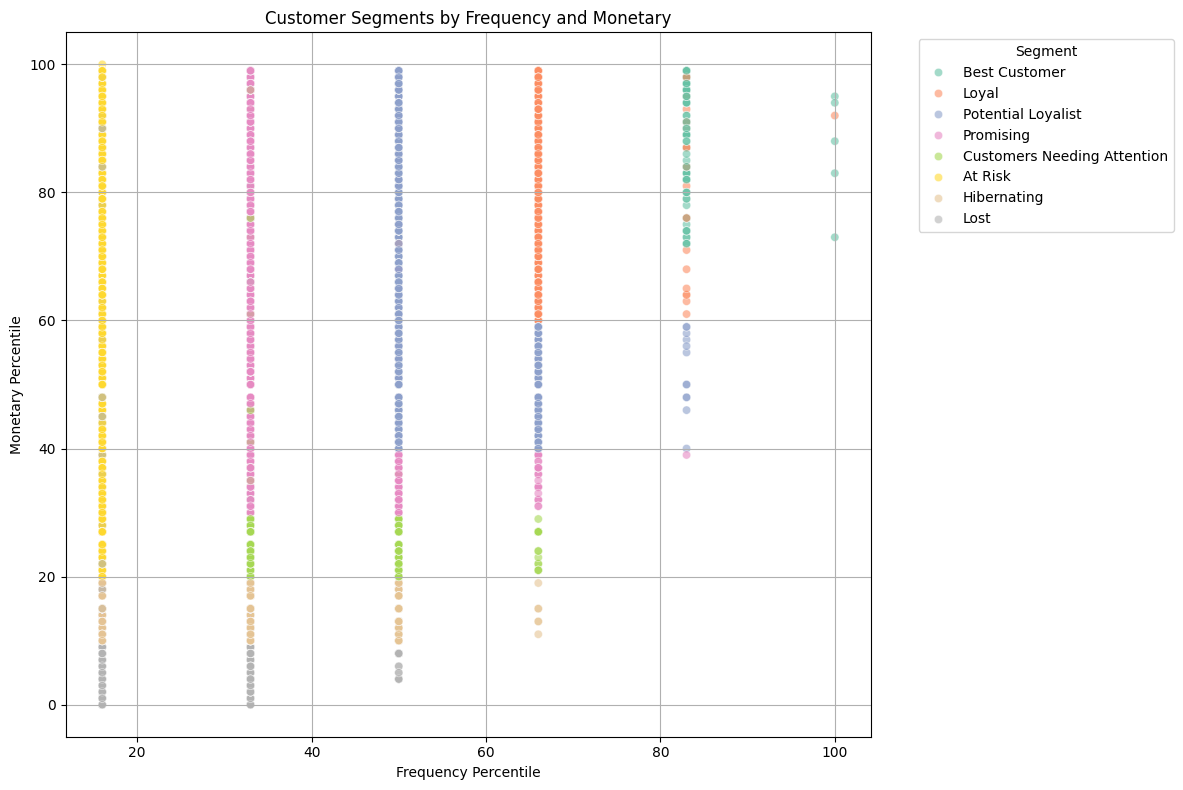

In [35]:
# Plotting the customer segmentation by Frequency and Monetary,
# showing the visible skewness
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=normalisedRFM,
    x='Frequency',
    y='Monetary',
    hue='CustomerGroup',
    palette='Set2',
    alpha=0.6
)

plt.title('Customer Segments by Frequency and Monetary')
plt.xlabel('Frequency Percentile')
plt.ylabel('Monetary Percentile')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

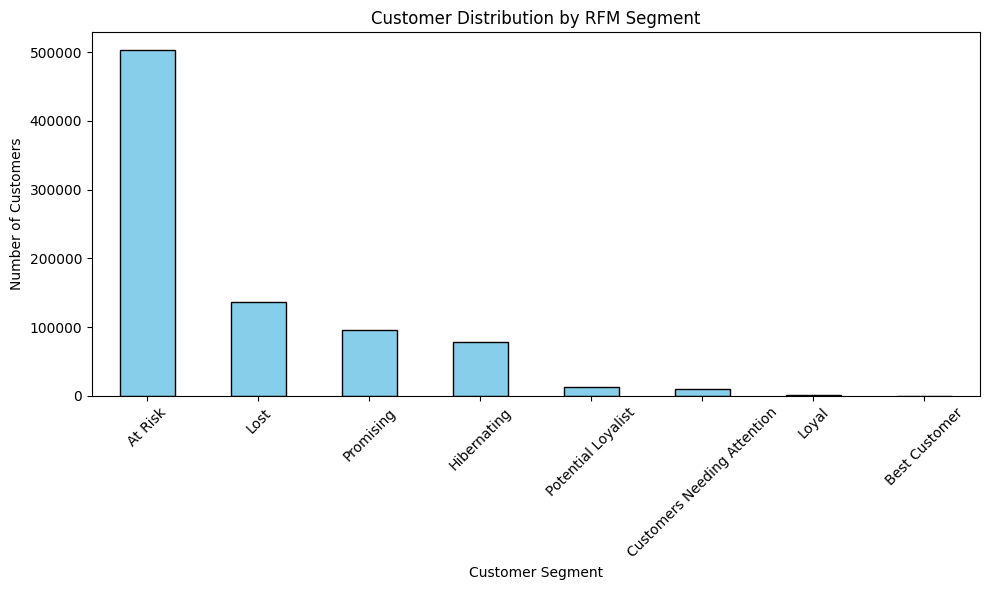

In [36]:
# Creating visualisation for distribution (using Histogram)
groupCount = normalisedRFM['CustomerGroup'].value_counts()
plt.figure(figsize=(10, 6))
groupCount.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Customer Distribution by RFM Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task A.7

When constructing the RFM model, we discovered the right-skewness of Monetary values (and the issues this causes) from the highest transaction amounts per customer. The highest, being 1,560,034.99.

We discovered only one customer fell into a category outside of lost, customer C7525532, who categorised as Promising. RFM definitions (boundaries) for Customer Types did not take into account the skewness of the high monetary purchases which meant that only a customer making massive transactions regularly and recently would class as a 'Best Customer' which is unrealistic.

If we were to base the model on this, with every lower value comparing to the highest serving monetary value, every value below would be seen as a minute percentage even if those make up the majority of total transaction amounts grouped by customer.

This means the customer type boundaries need to be changed to better gather information from this data model.

# Task B
B.1 & B.2 within report

# Task B.3

In [37]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pandas.read_csv('bankTransactions_rfm.csv')
originalDF = pandas.read_csv('bank_transactions_cleaned.csv')

In [38]:
# Adding customer location into rfm df
merged_df = pandas.merge(df, originalDF[['CustomerID', 'CustLocation']], on='CustomerID', how='left')
merged_df.head()

,CustomerID,Recency,Frequency,Monetary,CustLocation
0,C1010011,75,2,4750.0,NOIDA
1,C1010011,75,2,4750.0,NEW DELHI
2,C1010012,118,1,1499.0,MUMBAI
3,C1010014,155,2,1205.0,MUMBAI
4,C1010014,155,2,1205.0,MUMBAI


In [39]:
# Creating seperate rfm model of top 5 locations.
toplocations = originalDF['CustLocation'].value_counts().head()
topLocationsRFM = merged_df[merged_df['CustLocation'].isin(toplocations.index)]
topLocationsRFM.head()

,CustomerID,Recency,Frequency,Monetary,CustLocation
1,C1010011,75,2,4750.0,NEW DELHI
2,C1010012,118,1,1499.0,MUMBAI
3,C1010014,155,2,1205.0,MUMBAI
4,C1010014,155,2,1205.0,MUMBAI
7,C1010028,103,1,557.0,DELHI


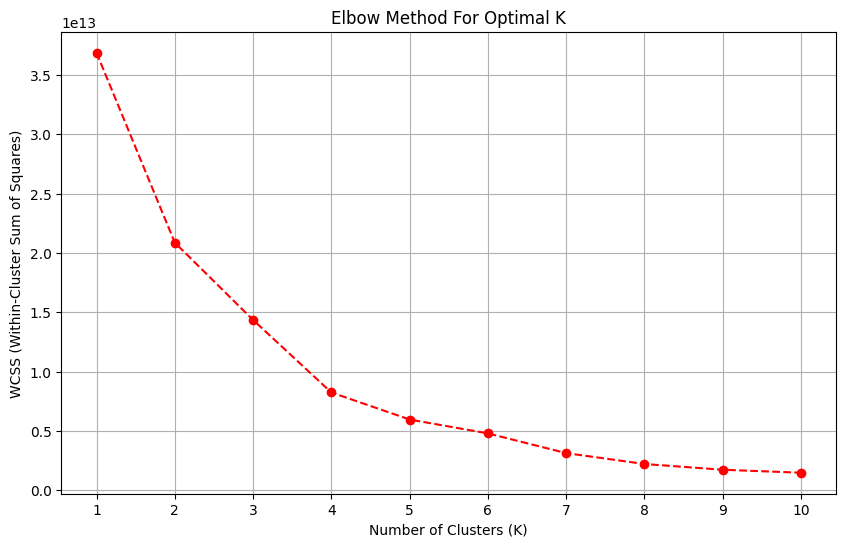

In [40]:
# Elbow method with original data
data = df[["Recency", "Frequency", "Monetary"]]

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [41]:
# Implementing kmeans with 4 clusters as calculated above
km=KMeans(n_clusters=4)
km.fit(data)
clusters=km.predict(data)
data["Clusters"] = clusters
data.head()

,Recency,Frequency,Monetary,Clusters
0,75,2,4750.0,0
1,118,1,1499.0,0
2,155,2,1205.0,0
3,86,1,30.0,0
4,114,1,5000.0,0


In [42]:
# Cluster sizes
clustSize = data.groupby('Clusters').size().to_frame()
clustSize.columns = ["KMeans_size"]
clustSize

,KMeans_size
Clusters,
0,823783
1,1204
2,13544
3,30


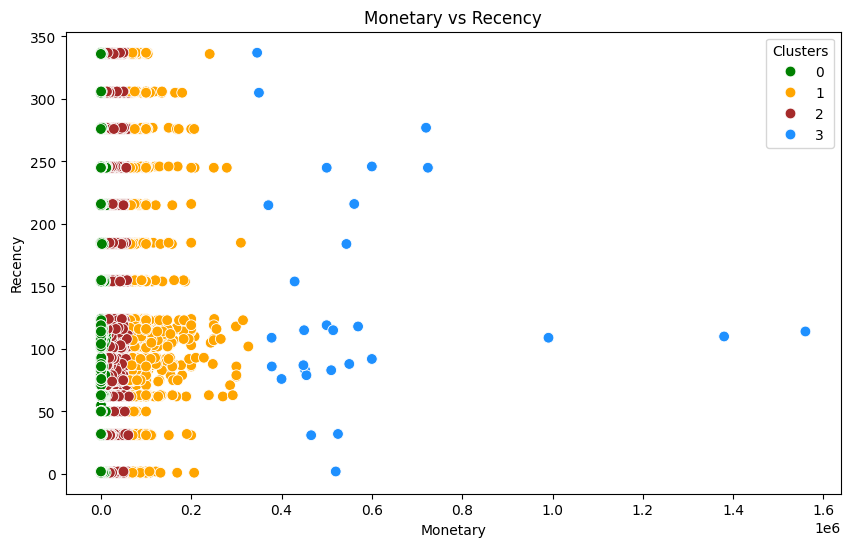

In [43]:
# 2D scatterplot showing monetary against recency for all locations
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Monetary',y = 'Recency',hue="Clusters",
palette=['green','orange','brown','dodgerblue'], legend='full',data = data ,s = 60 )
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Monetary vs Recency')
plt.show()

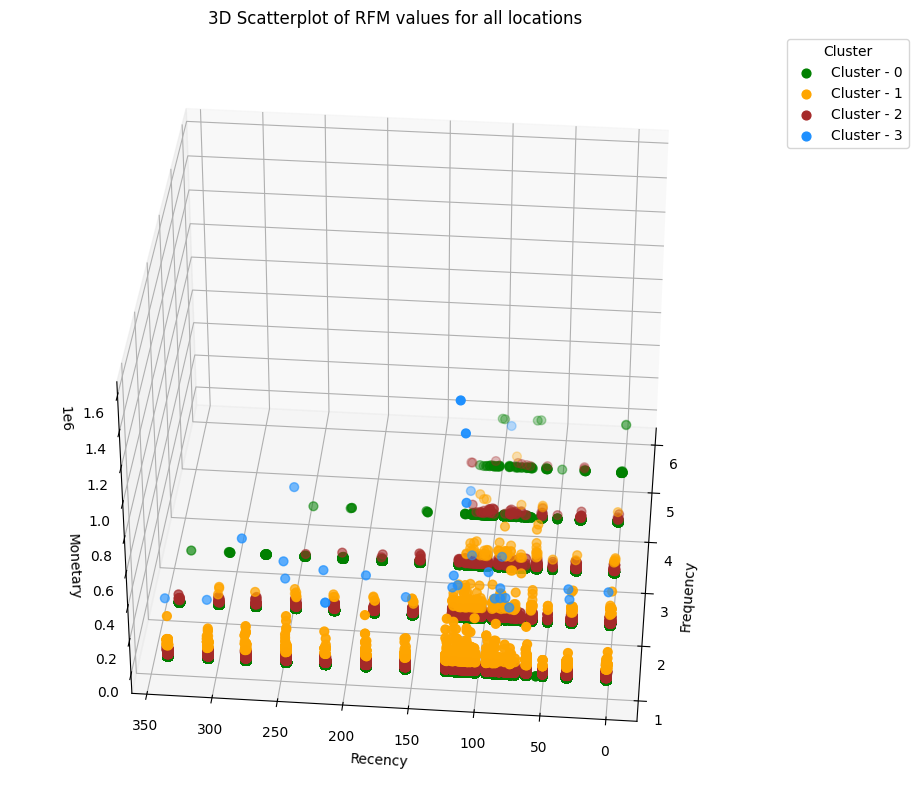

In [44]:
# 3D scatterplot of RFM values for all locations

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Frequency[data.Clusters == 0], data["Recency"][data.Clusters == 0], data["Monetary"][data.Clusters == 0], c='green', s=40, label='Cluster - 0')
ax.scatter(data.Frequency[data.Clusters == 1], data["Recency"][data.Clusters == 1], data["Monetary"][data.Clusters == 1], c='orange', s=40, label='Cluster - 1')
ax.scatter(data.Frequency[data.Clusters == 2], data["Recency"][data.Clusters == 2], data["Monetary"][data.Clusters == 2], c='brown', s=40,label='Cluster - 2')
ax.scatter(data.Frequency[data.Clusters == 3], data["Recency"][data.Clusters == 3], data["Monetary"][data.Clusters == 3], c='dodgerblue', s=40, label='Cluster - 3')
ax.view_init(35, 185)
plt.title("3D Scatterplot of RFM values for all locations")
plt.xlabel("Frequency")
plt.ylabel("Recency")
ax.set_zlabel('Monetary')
ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

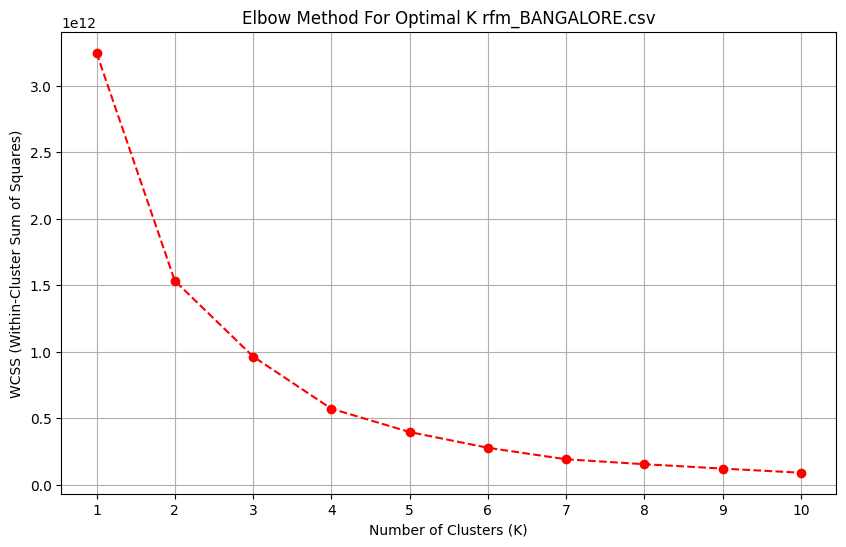

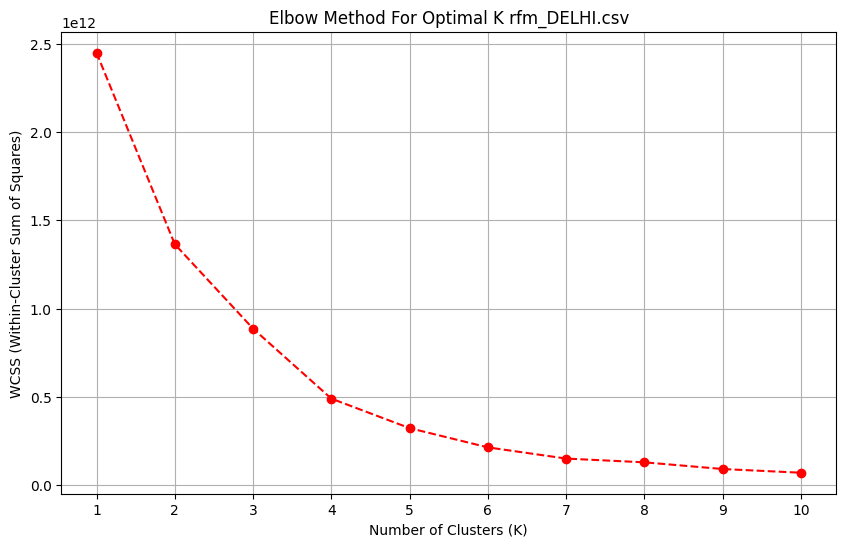

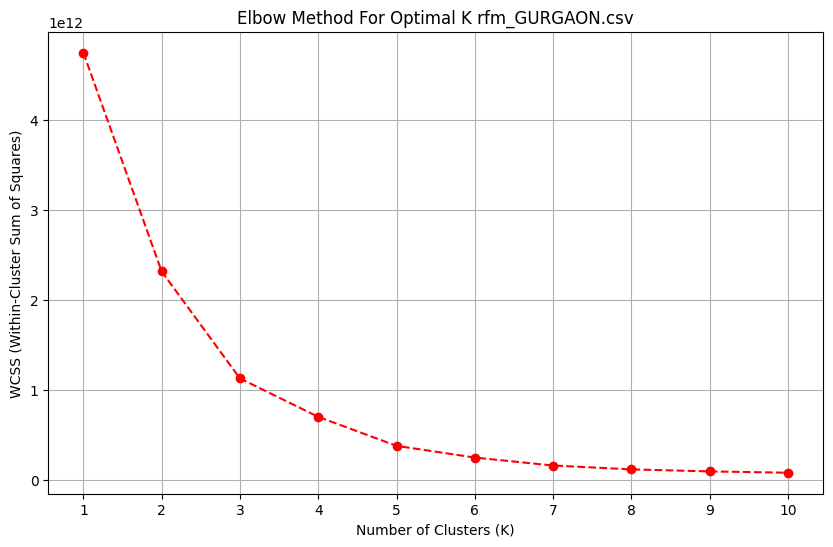

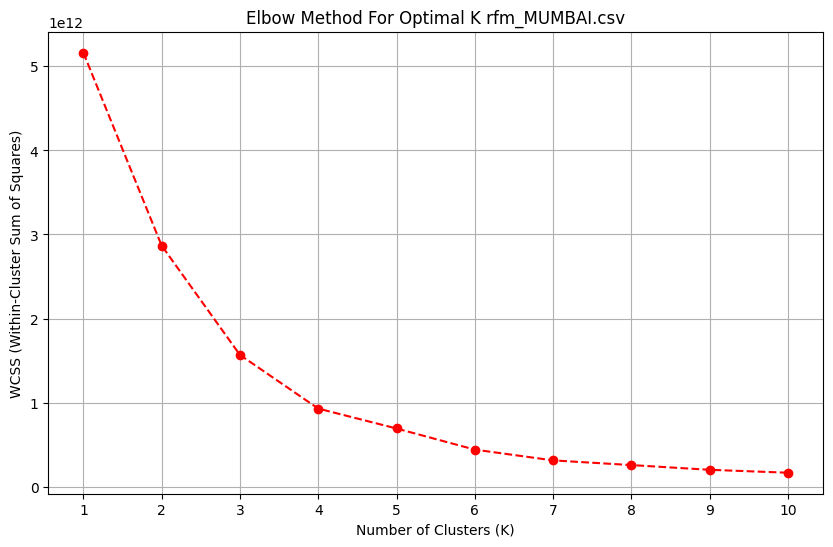

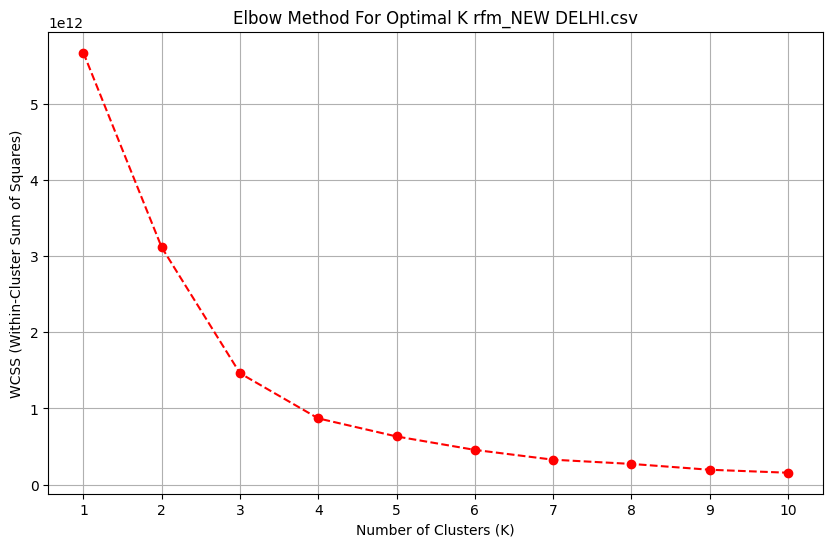

In [45]:
# elbow method for individual locations
locationCSV = ['rfm_BANGALORE.csv', 'rfm_DELHI.csv', 'rfm_GURGAON.csv', 'rfm_MUMBAI.csv', 'rfm_NEW DELHI.csv']
for loc in locationCSV:
  data = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
  wcss = []

  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, random_state=42)
      kmeans.fit(data)
      wcss.append(kmeans.inertia_)

  plt.figure(figsize=(10, 6))
  plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
  plt.title(f"Elbow Method For Optimal K {loc}")
  plt.xlabel("Number of Clusters (K)")
  plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
  plt.xticks(range(1, 11))
  plt.grid(True)
  plt.show()


In [46]:
location_data = {}  # dictionary to hold location dfs

# kmeans calculation per location adding to location dictionary
for loc in locationCSV:
  if loc != 'rfm_GURGAON.csv':
    location_data[loc] = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
    km = KMeans(n_clusters=4)
    km.fit(location_data[loc])
    clusters = km.predict(location_data[loc])
    location_data[loc]["Clusters"] = clusters
  else:
    location_data[loc] = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
    km = KMeans(n_clusters=3)
    km.fit(location_data[loc])
    clusters = km.predict(location_data[loc])
    location_data[loc]["Clusters"] = clusters

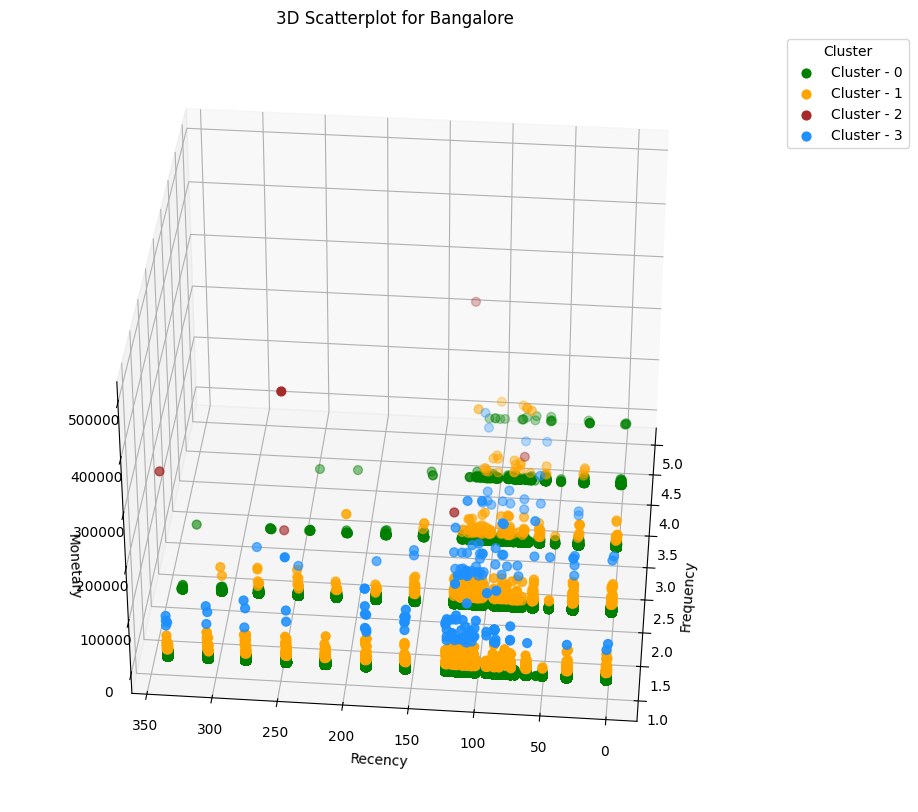

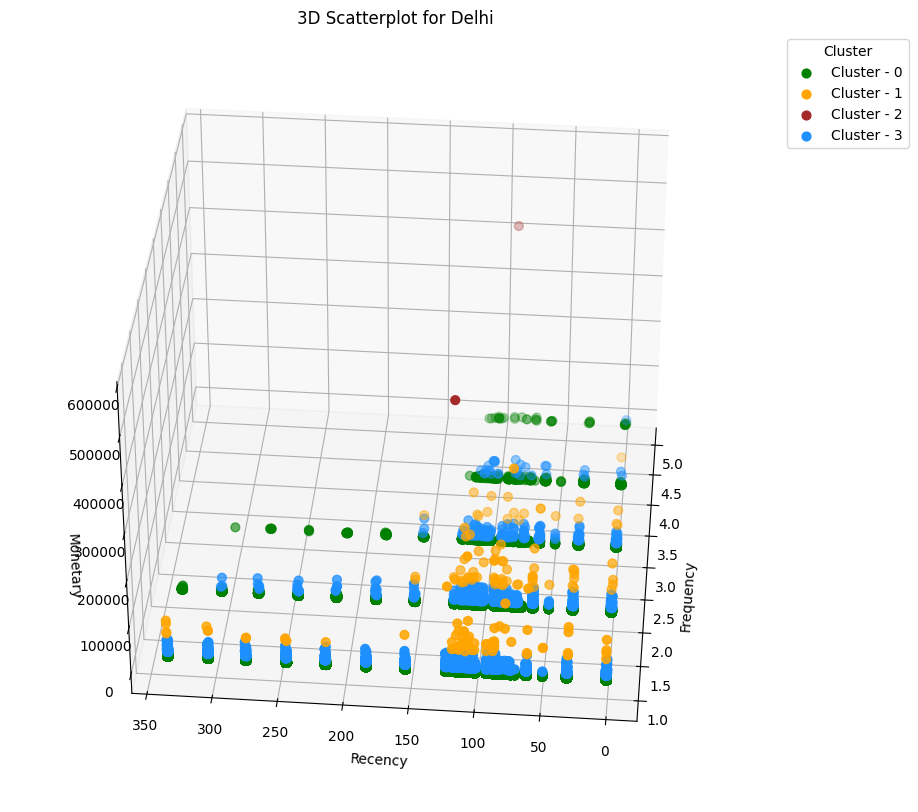

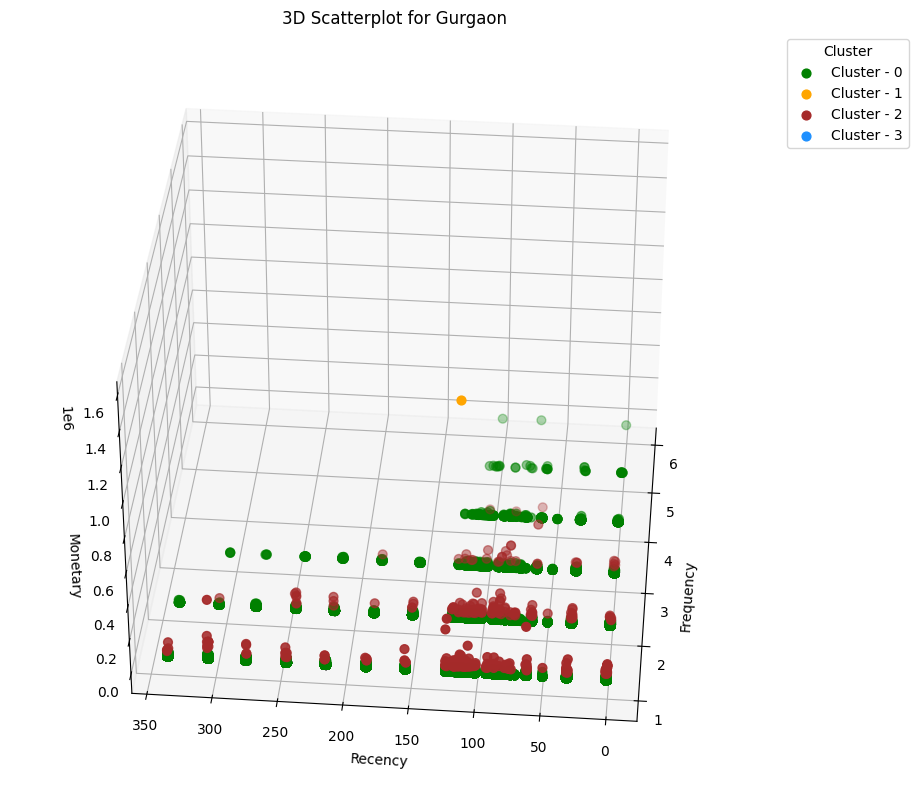

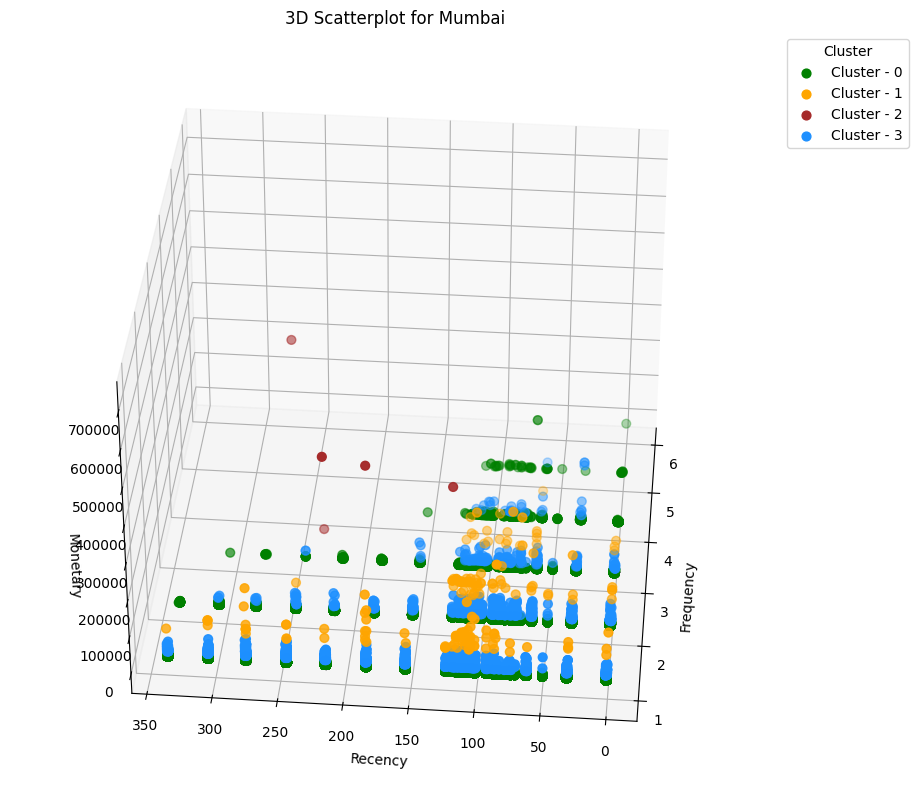

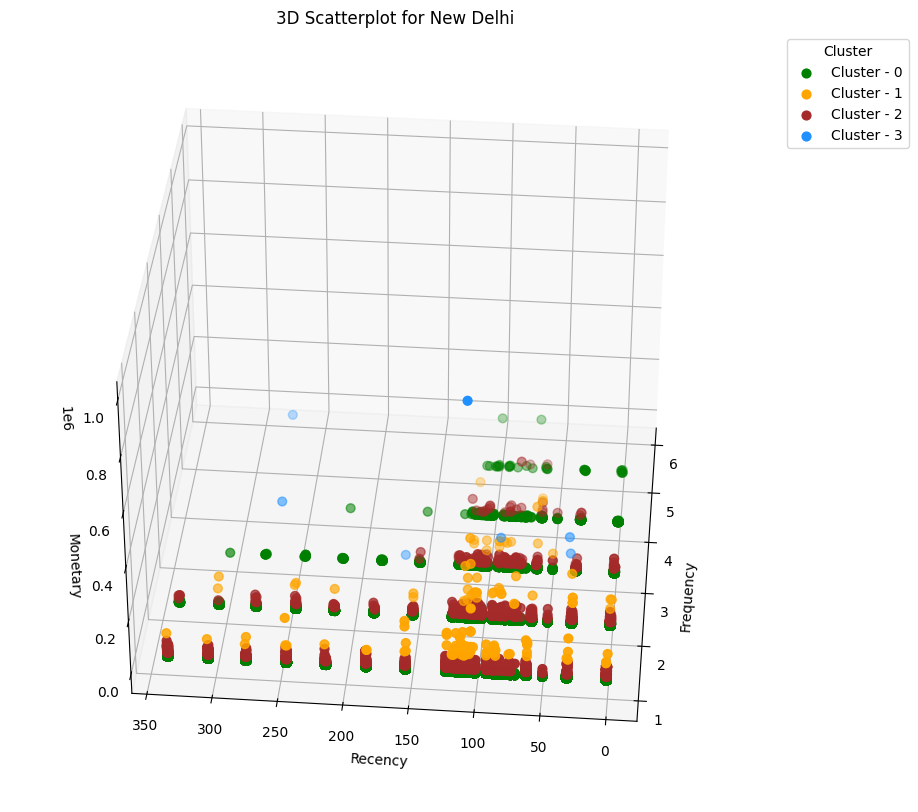

In [47]:
# 3D scatterplot for individual locations.

# dictionary of names and location data frames as dfs no longer contain location name
kmeansLocation = {
    'Bangalore': location_data['rfm_BANGALORE.csv'],
    'Delhi': location_data['rfm_DELHI.csv'],
    'Gurgaon': location_data['rfm_GURGAON.csv'],
    'Mumbai': location_data['rfm_MUMBAI.csv'],
    'New Delhi': location_data['rfm_NEW DELHI.csv']
}



for name, loc in kmeansLocation.items():
  data = loc
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data.Frequency[data.Clusters == 0], data["Recency"][data.Clusters == 0], data["Monetary"][data.Clusters == 0], c='green', s=40, label='Cluster - 0')
  ax.scatter(data.Frequency[data.Clusters == 1], data["Recency"][data.Clusters == 1], data["Monetary"][data.Clusters == 1], c='orange', s=40, label='Cluster - 1')
  ax.scatter(data.Frequency[data.Clusters == 2], data["Recency"][data.Clusters == 2], data["Monetary"][data.Clusters == 2], c='brown', s=40,label='Cluster - 2')
  ax.scatter(data.Frequency[data.Clusters == 3], data["Recency"][data.Clusters == 3], data["Monetary"][data.Clusters == 3], c='dodgerblue', s=40, label='Cluster - 3')
  ax.view_init(35, 185)
  plt.title(f"3D Scatterplot for {name}")
  plt.xlabel("Frequency")
  plt.ylabel("Recency")
  ax.set_zlabel('Monetary')
  ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))
  plt.show()

# Task C
Task C.1 & C.2 within the report